In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Gamma's Effect on Volatility

In [2]:
# Import CSV File

volatility_df = pd.read_csv("UpdatedGammaVix.csv")

In [3]:
# View DataFrame

volatility_df

,date,price,Vix Previous Close,Vix 21 Moving Average,SPX Change,DIX Previous Close,GEX Previous Close,MOVE
0,5/31/11,1345.199951,15.980000,16.911429,0.010593,0.400935,9.186650e+08,71.50
1,6/1/11,1314.550049,15.450000,17.021429,-0.022785,0.402477,1.501019e+09,72.90
2,6/2/11,1312.939941,18.299999,17.087619,-0.001225,0.441582,7.654729e+08,76.60
3,6/3/11,1300.160034,18.090000,17.129048,-0.009734,0.413070,7.370545e+08,75.90
4,6/6/11,1286.170044,17.950001,17.142857,-0.010760,0.436110,4.059565e+08,75.80
...,...,...,...,...,...,...,...,...
2879,11/4/22,3770.550049,25.299999,29.209524,0.013619,0.442476,-6.368992e+08,128.44
2880,11/7/22,3806.800049,24.549999,28.875714,0.009614,0.425303,5.863258e+08,128.33
2881,11/8/22,3828.110107,24.350000,28.546667,0.005598,0.449861,1.164755e+09,126.33
2882,11/9/22,3748.570068,25.540001,28.187619,-0.020778,0.438960,1.395167e+09,124.40


In [4]:
# Create data frame with SPX and Gamma levels

spx_gamma_df = volatility_df[["SPX Change", "GEX Previous Close"]]

Text(0.5, 1.0, 'SPX Change by GEX level')

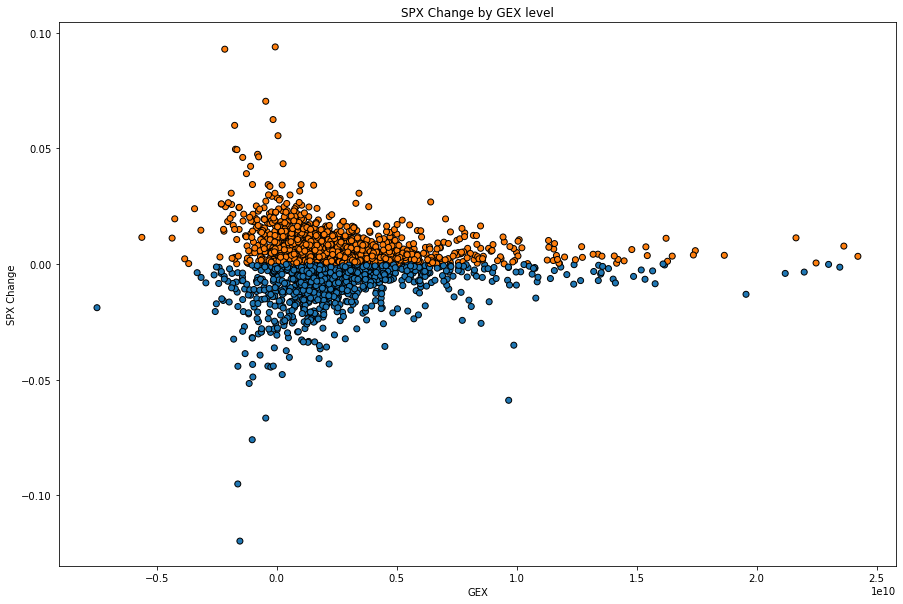

In [5]:
# Graph Relationship between Gamma and SPX Movement

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
colors = np.where(spx_gamma_df["SPX Change"] <0, 'C0', 'C1')
plt.scatter(x = spx_gamma_df["GEX Previous Close"], y = spx_gamma_df["SPX Change"],cmap = 'Spectral', edgecolor = 'k', c= colors)
plt.xlabel("GEX")
plt.ylabel("SPX Change")
plt.title("SPX Change by GEX level")

In [6]:
# Calculate Absolute Moves in SPX

volatility_df["Absolute SPX Change"] = volatility_df["SPX Change"].abs()

Text(0.5, 1.0, 'Absolute SPX Change by GEX level')

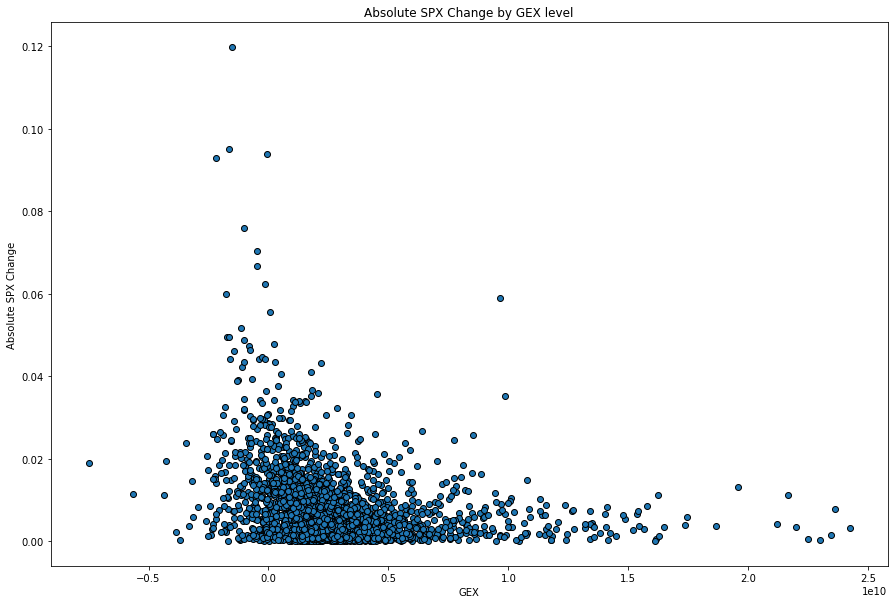

In [7]:
# Graph SPX Change in Absolute move

plt.scatter(x = volatility_df["GEX Previous Close"], y = volatility_df["Absolute SPX Change"],cmap = 'Spectral', edgecolor = 'k')
plt.xlabel("GEX")
plt.ylabel("Absolute SPX Change")
plt.title("Absolute SPX Change by GEX level")

In [8]:
### Observation: In the above graph we see that Gamma Exposure (GEX) plays a big role in determining the 
### day-to-day volatility of the S&P 500 (SPX). As Gamma Exposure increases, the S&P contracts in volatility. 
### As Gamma decreases, S&P volatility increases and we experience wider trading ranges. Due to what this graph shows,
### we believe that we can find a relationship between Actual Realized volatility and Gamma Exposure. Our goal is to 
### find the relationship, and then see if we can compare that to the Implied Volatility to gain a trading edge. 

# Implied vs. Realized Volatility

In [9]:
# Download S&P 500 ETF (SPY) data and create DataFrame

spy_df = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [10]:
# Calculate the Daily Change in S&P 500 ETF

spy_df["Daily Return"] = spy_df["Adj Close"].pct_change()

In [11]:
# Drop Columns

spy_df.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)

In [12]:
# Download CBOE Volatility Index (VIX) data and create DataFrame

vix_df = yf.download("^VIX", start="1993-01-29")

[*********************100%***********************]  1 of 1 completed


In [13]:
# Use "Rule of 16" to determine the One-Day Implied Move in Market

vix_df["Implied One-Day Move"] = (vix_df["Close"] / np.sqrt(252))/100

In [14]:
# Drop Columns

vix_df.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)

In [15]:
# Concatenate VIX and SPY DataFrames

spy_vix_df = pd.concat([spy_df, vix_df], axis=1)

In [16]:
# Drop Columns

spy_vix_df.drop(columns=["Adj Close"], inplace=True)

In [17]:
# Display the Absolute Daily Move in S&P 500 ETF

spy_vix_df["Absolute Daily Return"] = spy_vix_df["Daily Return"].abs()

In [18]:
# Calculate Spread between Implied and Realized Volatility

spy_vix_df["Implied vs. Realized Spread"] =spy_vix_df["Implied One-Day Move"] - spy_vix_df["Absolute Daily Return"]

In [19]:
# Show Stats for Implied vs Realized Spread

spy_vix_df["Implied vs. Realized Spread"].describe()

count    7505.000000
mean        0.004509
std         0.007341
min        -0.110557
25%         0.001440
50%         0.005482
75%         0.008446
max         0.043231
Name: Implied vs. Realized Spread, dtype: float64

Text(0.5, 1.0, 'History of Implied vs Realized Volatility')

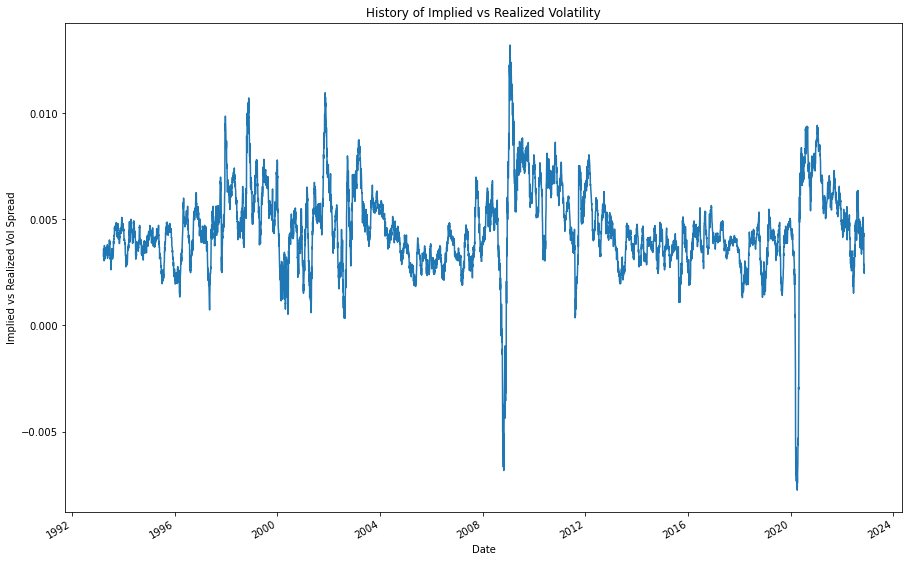

In [20]:
# Plot the 35 day rolling average in Implied vs. Realized Volatility

spy_vix_df["Implied vs. Realized Spread"].rolling(35).mean().plot()
plt.xlabel("Date")
plt.ylabel("Implied vs Realized Vol Spread")
plt.title("History of Implied vs Realized Volatility")

In [21]:
###  Observation: The chart above shows that there is, generally, a premium that is paid by those who buy puts. This
### premium is shown from the spread between Implied vs Realized (Actual) volatility. The chart shows that on average, there is 
### a premium of about 45 basis points over the time span. This means that for a majority of the time, shorting 
### volatility is a profitable strategy. However, As one can see in 2008 and 2020, shorting volatility can be very
### dangerous. This is why it is important to not just short volatility blindly as many funds do. This graph also 
### shows us that some of the best times to short volatility, is right after the worst times. 

In [22]:
### This chart above shows the basis for our project. As the chart shows there is a correct time to short volatility
### and there is an incorrect time to short volatility, and instead buy it. For our project, we aim to better predict
### when to do which. 

# Machine Learning

In [85]:
# Import Libraries for Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [283]:
# Set X and Y Variables

y = volatility_df["Absolute SPX Change"]
X = volatility_df.drop(columns=["Absolute SPX Change", "date", "SPX Change", "price"])

In [284]:
# Split train and Test Data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [285]:
# Set Scaler

scaler = StandardScaler()

In [286]:
# Scale Data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [287]:
# Import ML Regressor

from sklearn.ensemble import RandomForestRegressor

In [288]:
# Set Model

model = RandomForestRegressor()

In [289]:
# Fit Model

model.fit(X_train,y_train)

RandomForestRegressor()

In [290]:
# Make Predictions

y_pred = model.predict(X_test)

In [291]:
# View Model Score

model.score(X,y)

0.7554330965340342

In [292]:
# View R2 Score

r2_score(y_pred, y_test)

-0.7013846258790177

In [294]:
# View Model RMSE

np.sqrt(mean_squared_error(y_pred, y_test))

0.007080254309130224

# Model BackTesting - Model vs. VIX

In [99]:
# Create DataFrame of Model Predictions and Actual Observations

results_df = pd.DataFrame(y_pred, y_test)

In [103]:
# Call Columns of Vol DataFrame

vix_absolute_df = volatility_df[["Vix Previous Close", "Absolute SPX Change"]]

In [106]:
# Set Index

vix_absolute_df.set_index("Absolute SPX Change", inplace=True)

In [108]:
# Merge DataFrames

vix_predict_abs = vix_absolute_df.join(results_df)

In [111]:
vix_predict_abs.reset_index(inplace=True)

In [115]:
# Reset Index

vix_predict_abs.dropna(inplace=True)

In [139]:
# View DataFrame

vix_predict_abs

,Absolute SPX Change,0,Impled SPX Move
3,0.009734,0.010082,0.011396
4,0.010760,0.010898,0.011307
6,0.004187,0.008245,0.011383
10,0.012612,0.007551,0.012353
13,0.003045,0.011719,0.014319
...,...,...,...
2853,0.021126,0.023452,0.019012
2854,0.015067,0.025949,0.020057
2860,0.007492,0.022634,0.019755
2881,0.005598,0.012846,0.015339


In [146]:
# Find Difference between Model Predictions and Market Absolute Returns

vix_predict_abs["Model Delta"] = (vix_predict_abs[0] - vix_predict_abs["Absolute SPX Change"]).abs()

In [147]:
# Find Difference between VIX Implied Predictions and Market Absolute Returns

vix_predict_abs["VIX Delta"] = (vix_predict_abs["Impled SPX Move"] - vix_predict_abs["Absolute SPX Change"]).abs()

Text(0.5, 1.0, 'History of Model Implied vs Realized Volatility')

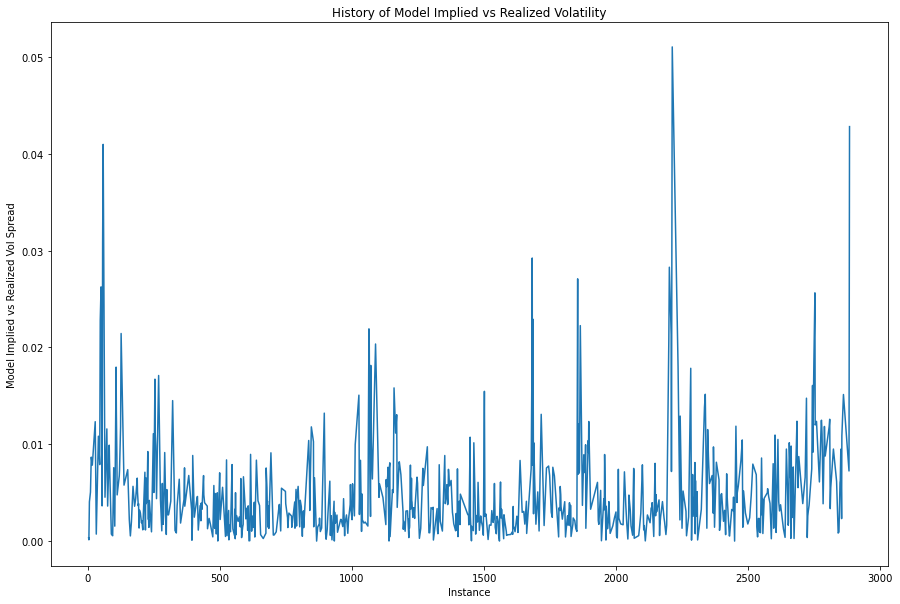

In [318]:
# Plot Model Predictions vs Absolute Realized Volatility

model_delta_plot = vix_predict_abs["Model Delta"].plot()
plt.xlabel("Instance")
plt.ylabel("Model Implied vs Realized Vol Spread")
plt.title("History of Model Implied vs Realized Volatility")

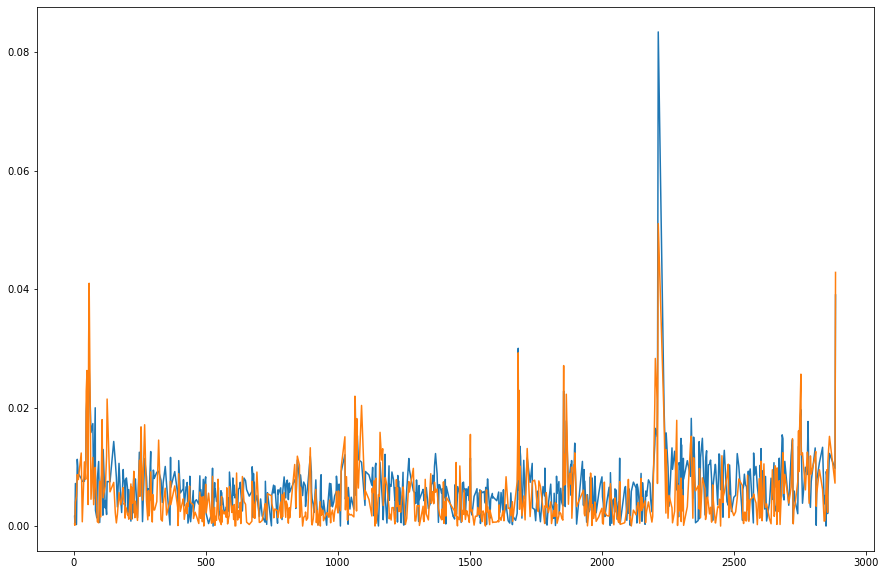

In [328]:
ax = vix_predict_abs["VIX Delta"].plot()
vix_predict_abs["Model Delta"].plot(ax=ax)
plt.show()


Text(0.5, 1.0, 'History of VIX Implied vs Realized Volatility')

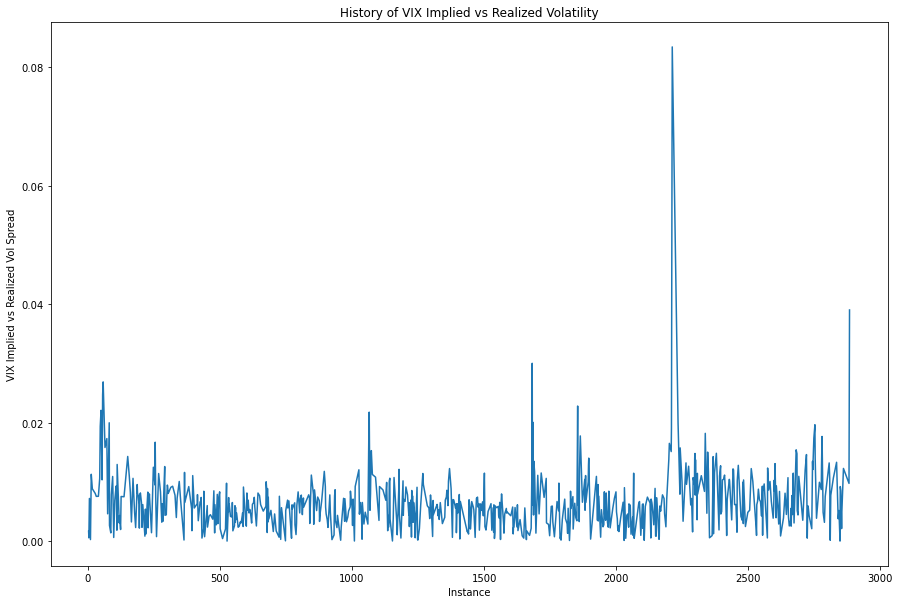

In [319]:
# Plot VIX Implied Predictions vs Absolute Realized Volatility

vix_delta_plot = vix_predict_abs["VIX Delta"].plot()
plt.xlabel("Instance")
plt.ylabel("VIX Implied vs Realized Vol Spread")
plt.title("History of VIX Implied vs Realized Volatility")

In [153]:
# View Model Prediction Statistics

vix_predict_abs["Model Delta"].describe()

# View VIX Implied Statistics

vix_predict_abs["VIX Delta"].describe()

count    721.000000
mean       0.004832
std        0.005261
min        0.000006
25%        0.001669
50%        0.003279
75%        0.006422
max        0.051038
Name: Model Delta, dtype: float64

In [ ]:
### Observation: The two charts above show the relationship between our Model's predicted Volatility vs the actual 
### volatility of the markets and the relationship between the VIX's implied volatility vs the actual volatility
### of the markets. As discussed in the previous model above, there is usually a premium to volatility as realized
### volatility doesn't exceed the implied volatility. The difference in implied vs. rezlized is measured in a spread. 
### The goal of this project is to minimize the spread between a predicted or implied volatility, and the actual 
### realized volatility. These graphs show that our model was able to do just that. By the prediction stats, we see
### that the average spread between our model's implied volatility and realized volatility, is by about 48 basis 
### points. This is compared to the VIX's average spread of about 64 basis points. 

<AxesSubplot:>

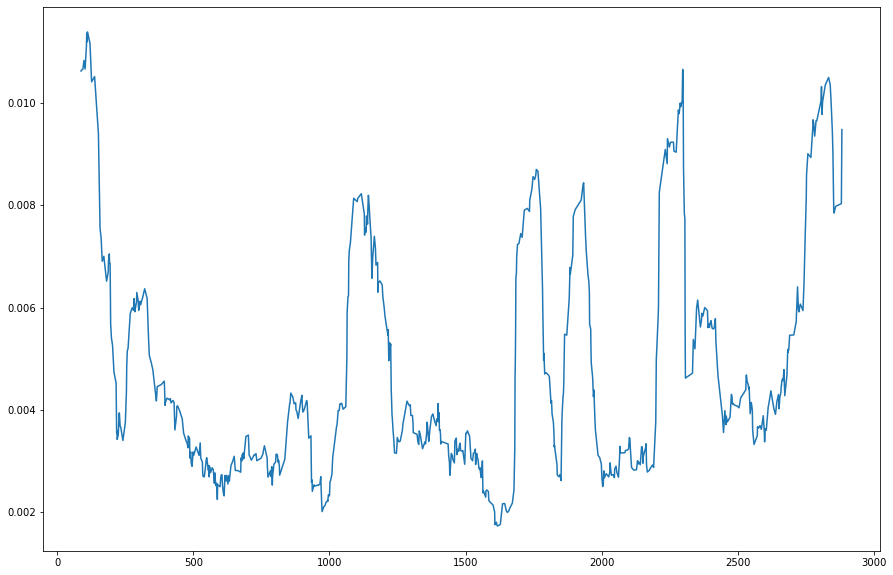

In [155]:
# Plot 21-day Rolling Average of Model Predictions vs Realized Volatility

vix_predict_abs["Model Delta"].rolling(21).mean().plot()

<AxesSubplot:>

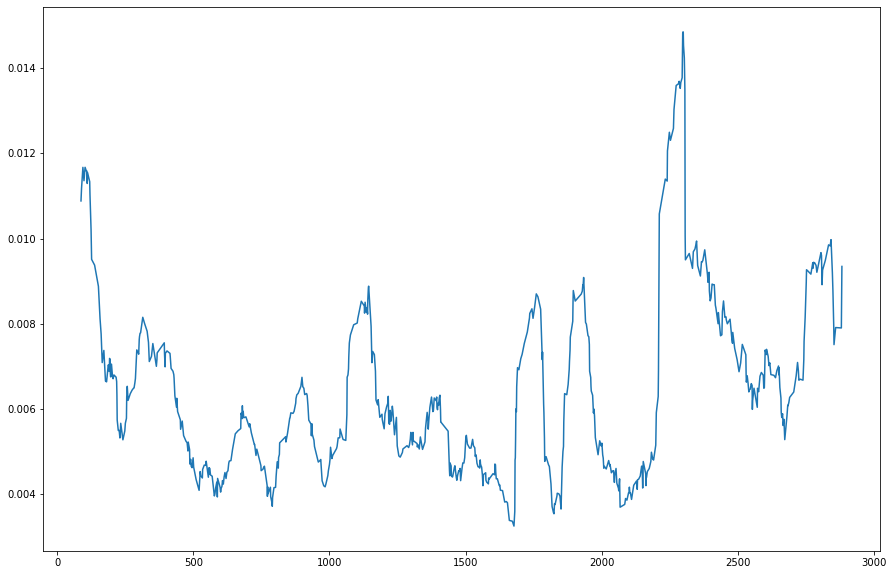

In [158]:
# Plot 21-day Rolling Average of VIX Implied Predictions vs Realized Volatility

vix_predict_abs["VIX Delta"].rolling(21).mean().plot()

Text(0.5, 1.0, 'History of VIX Implied vs Model Implied Spread')

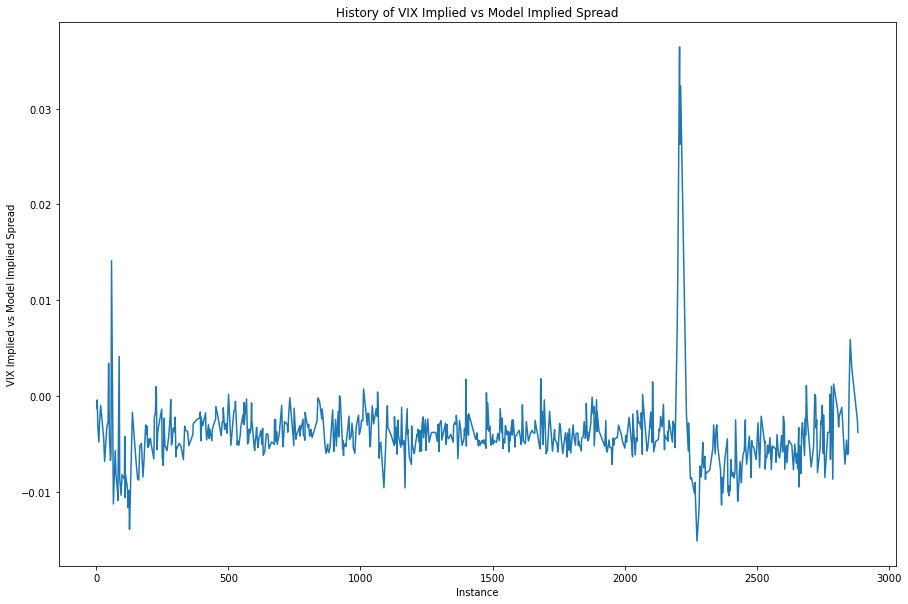

In [320]:
# Plot difference in Volatility Predictions between Model and VIX

(vix_predict_abs[0] - vix_predict_abs["Impled SPX Move"]).plot()
plt.xlabel("Instance")
plt.ylabel("VIX Implied vs Model Implied Spread")
plt.title("History of VIX Implied vs Model Implied Spread")

Text(0.5, 1.0, 'History of VIX Implied vs Realized Volatility (Rolling Average)')

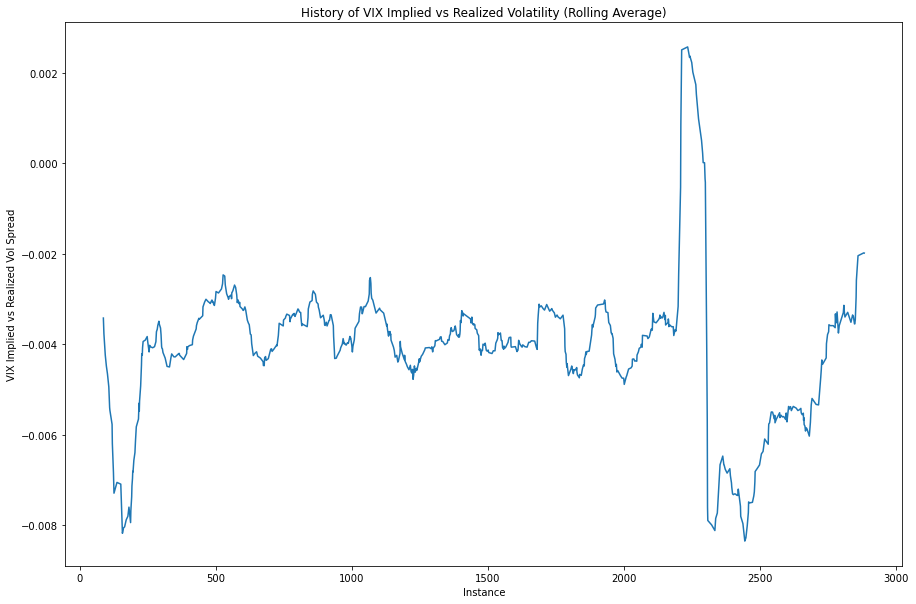

In [322]:
# Plot rolling 21-day average of Model Predictions vs VIX

(vix_predict_abs[0] - vix_predict_abs["Impled SPX Move"]).rolling(21).mean().plot()
plt.xlabel("Instance")
plt.ylabel("VIX Implied vs Realized Vol Spread")
plt.title("History of VIX Implied vs Realized Volatility (Rolling Average)")

In [ ]:
### The two charts above show the relationship between our model's Implied Volatility and the VIX. This chart simply 
### shows the difference between volatility opinion's between the two. When the line is below 0, our model believes 
### that the VIX's implied volatility is too high, and one should short the volatility. When the line is above 0, that
### shows that our model believes volatility is too low, and one should be buying volatility. It is interesting that 
### our model believes that the VIX is usually expensive as it spends a majority of it's time below the 0 level. 
### As we look at trends in the charts, we see that our model saw big advantages in the volatility markets both before
### and after the COVID crash in 2020. Looking at recent trends we see that shorting volatility is getting less and 
### less attractive. 

# Model Metrics

In [317]:
# Import Libraries

from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Find RMSE of Model

np.sqrt(mean_squared_error(y_test, y_pred))

0.007129477133786902

In [36]:
# Find R2 score

r2_score(y_test, y_pred)

0.3369986119011853

# Feature Importance

In [37]:
# Label Features

importances_names = model.feature_names_in_

In [38]:
# Set Importances

importances=model.feature_importances_

In [39]:
# Make DataFrame

importances_df = pd.DataFrame(importances,importances_names)

In [40]:
# Sort Values by Importance

importances_df.sort_values(by=0, ascending=False)

,0
Vix Previous Close,0.460683
GEX Previous Close,0.161458
MOVE,0.133937
Vix 21 Moving Average,0.123501
DIX Previous Close,0.120421


Text(0.5, 1.0, 'Feature Importance from Random Forest')

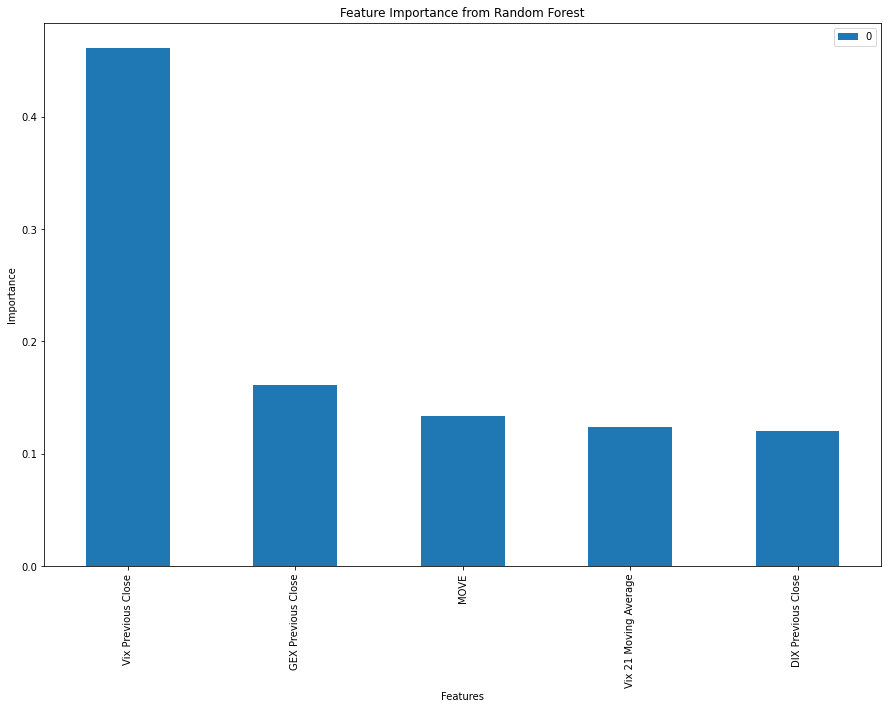

In [41]:
# Graph Importances

importances_df.sort_values(by = 0, ascending=False).plot(kind = "bar")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")

# Market Liquidity vs Volatility

In [42]:
### Insight: For the model below, we wanted to see what the effect of Top of Book Liquidity would have on volatility. 
### We hypothesize that the less liquidity there is in markets, the more volatile the market is. Unfortunately, data
### for what we are trying to model here is very hard to obtain. Top of Book Liquidity data via the Chicago Mercantile
### Exchange (CME), was going to cost ~$19k if we wanted to capture the data that goes back to the May 31, 2011 start
### date in our other data collected above. Fortunately, the CME provides 2-year sample data we were able to use to at 
### least get a fraction of our time period. The results from that data are below. 


In [43]:
# Import CSV file and create DataFrame

top_of_book_df = pd.read_csv("iiiaaa.csv")

In [44]:
# View DataFrame

top_of_book_df

,date,price,Vix Previous Close,Vix 21 Moving Average,SPX Change,DIX Previous Close,GEX Previous Close,MOVE,Top of Book
0,11/16/20,3626.910000,23.100000,29.720476,0.011648,0.431061,6.032393e+09,42.490002,51.7
1,11/17/20,3609.530000,22.450001,29.412381,-0.004792,0.414971,5.568672e+09,43.080002,64.2
2,11/18/20,3567.800000,22.709999,29.150000,-0.011561,0.440556,5.804662e+09,43.619999,73.1
3,11/19/20,3581.850000,23.840000,28.886190,0.003938,0.416999,3.498179e+09,43.529999,51.9
4,11/20/20,3557.540000,23.110001,28.676190,-0.006787,0.438597,5.497968e+09,42.310001,54.5
...,...,...,...,...,...,...,...,...,...
496,11/4/22,3770.550049,25.299999,29.209524,0.013619,0.442476,-6.368992e+08,128.440002,22.1
497,11/7/22,3806.800049,24.549999,28.875714,0.009614,0.425303,5.863258e+08,128.330002,32.5
498,11/8/22,3828.110107,24.350000,28.546667,0.005598,0.449861,1.164755e+09,126.330002,39.2
499,11/9/22,3748.570068,25.540001,28.187619,-0.020778,0.438960,1.395167e+09,124.400002,29.2


In [45]:
# Drop Columns

top_of_book_df.drop(columns=["date", "price"], inplace=True)

In [46]:
# Create column with Absolute SPX move

top_of_book_df["SPX Move"] = top_of_book_df["SPX Change"].abs()

In [47]:
# Drop Columns

top_of_book_df.drop(columns=["SPX Change"], inplace=True)

In [48]:
# Create column that tracks the 7-day rolling average of Top of Book Depth

top_of_book_df["TOB Rolling"] = (top_of_book_df["Top of Book"].rolling(7).mean())

In [49]:
# Drop Columns

top_of_book_df.drop(columns=["Top of Book"], inplace=True)

In [50]:
# Drop Null Values

top_of_book_df.dropna(inplace=True)

# Machine Learning for Market Liquidity

In [51]:
# Set Y Variable

y = top_of_book_df["SPX Move"]

In [52]:
# Set X Variable

X = top_of_book_df.drop(columns=["SPX Move"])

In [53]:
# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [54]:
# Scale Data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Call Model

model = RandomForestRegressor()

In [56]:
# Fit Model

model.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
# Make Predictions

y_pred = model.predict(X_test)

In [58]:
# View Model Score

model.score(X,y)

0.6956733798286955

In [59]:
# View Predictions

y_pred

array([0.01416984, 0.00497055, 0.00550222, 0.00477669, 0.02325339,
       0.00532584, 0.01562306, 0.00482949, 0.00507364, 0.0190163 ,
       0.01452458, 0.00523032, 0.01314916, 0.00311422, 0.0123916 ,
       0.01645171, 0.01069875, 0.01215258, 0.00442555, 0.00783327,
       0.01273608, 0.00583277, 0.01656708, 0.01083   , 0.00309017,
       0.00469584, 0.00771158, 0.01650175, 0.01002417, 0.01249995,
       0.00544424, 0.00262499, 0.00708089, 0.00581843, 0.01272759,
       0.01807561, 0.01757809, 0.00943304, 0.0046075 , 0.00398706,
       0.01660558, 0.01153095, 0.01684831, 0.01162044, 0.00965067,
       0.00502235, 0.00749957, 0.00813888, 0.00571218, 0.01365867,
       0.01037095, 0.01571832, 0.01492282, 0.01009552, 0.00655931,
       0.00495978, 0.00950624, 0.00755891, 0.00654276, 0.01212531,
       0.00914215, 0.01123399, 0.00457192, 0.01156537, 0.01138002,
       0.01421554, 0.00894179, 0.00383221, 0.01315053, 0.00706535,
       0.0044871 , 0.01141796, 0.01948488, 0.00807138, 0.00418

# Feature Importance

In [60]:
# Create Feature Importances

importances_names = model.feature_names_in_

In [61]:
# Model Importances

importances=model.feature_importances_

In [62]:
# Create DataFrame of Importances

importances_df = pd.DataFrame(importances,importances_names)

In [63]:
# Sort Importances by Value

importances_df.sort_values(by=0, ascending=False)

,0
TOB Rolling,0.214161
Vix Previous Close,0.186580
MOVE,0.185882
GEX Previous Close,0.165758
DIX Previous Close,0.131189
Vix 21 Moving Average,0.116430


Text(0.5, 1.0, 'Feature Importance from Random Forest')

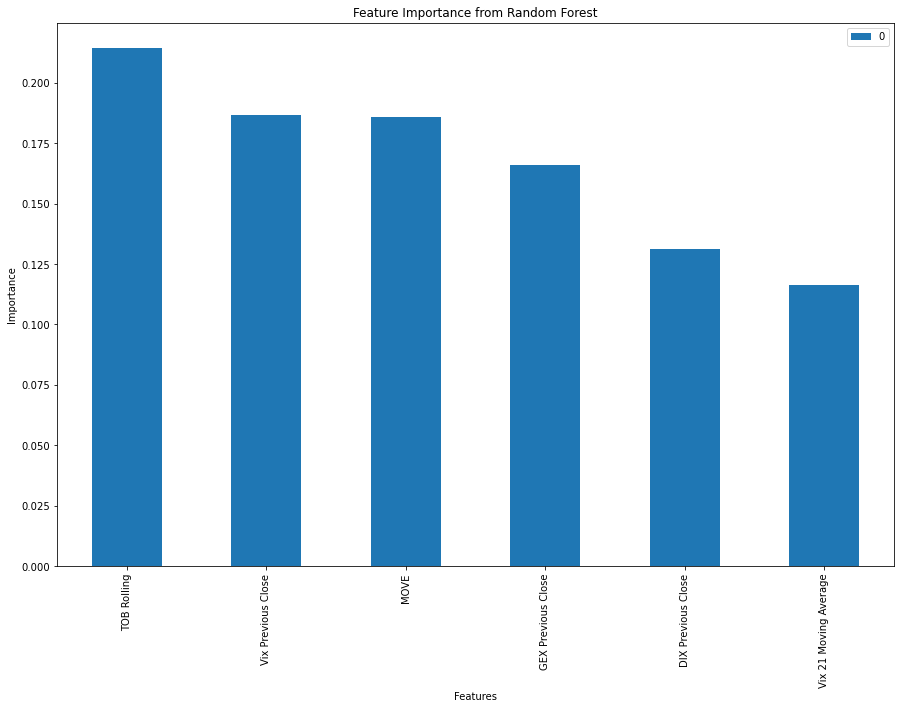

In [64]:
# Graph Importances

importances_df.sort_values(by = 0, ascending=False).plot(kind = "bar")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")

In [65]:
### There are several interesting ideas to take away from this model. The model had an RMSE score of about 0.7, which
### is slightly less than the previous model's score of about 0.75 . One of the key takeaways, from this model is that
### the time snapshot of the data we were able to obtain, did not feature the major volatility events of 2008, 2018, 
### or 2020. It would have been interesting to see what factor liquidity levels would have had during those highly 
### volatile time periods. Next, we can see that through the feature importance tool that our hypothesis was correct
### in believing that the liquidity, measured by the Top of Book liquidity level, was a major factor in determining
### the levels of realized volatility. As liquidity decreases, the level of volatility increases, and vice-versa. 
### Another key takeaway here, is just the general fluidity and ever-changing mechanics of the stock market. On our
### previous model, factors such as the various VIX measuring instruments played a much more important role in 
### determining volatility. In this much more narrow model with less data, factors such as treasury market volatility
### (MOVE) were more central to determining market volatility. This coincides with the overall Treasury Market weakness
### we have experienced for a large part of 2022. We believe that had we had data that would have spanned the course
### of the major 2008, 2018, and 2020 volatility events, this feature importance model would have placed more emphasis
### on our various VIX measuring metrics. 


# VIX Term Structure

In [ ]:
### Insight: VIX term structure is the relationship between VIX futures prices and maturity dates. It is said to be
### in Contango when VIX futures are priced higher than the VIX spot and in Backwardation when the relationship is
### reversed. For this, we hypothesize that there will be more volatility when the term structure is in backwardation.
### We also believe that the degree of backwardation/contango will play a role in volatility. 

In [295]:
# Import CSV File

vix_board_df = pd.read_csv("UpdateGammaVix.csv")

In [296]:
# Create column that measures spread of VIX 3m future vs VIX spot

vix_board_df["Vix 3 Spread"] = vix_board_df["Vix 3 Months"] - vix_board_df["VIX Spot"]

In [297]:
# Create column that measures spread of VIX 6m future vs VIX 3m future

vix_board_df["Vix 3-6 Spread"] = vix_board_df["Vix 6 Months"] - vix_board_df["Vix 3 Months"]

In [298]:
# View DataFrame

vix_board_df

,date,price,VIX Spot,Vix 21 Moving Average,SPX Change,DIX Previous Close,GEX Previous Close,MOVE,Vix 3 Months,Vix 6 Months,Vix 3 Spread,Vix 3-6 Spread
0,5/31/11,1345.199951,15.980000,16.911429,0.010593,0.400935,9.186650e+08,71.50,18.13000,20.01,2.150000,1.88000
1,6/1/11,1314.550049,15.450000,17.021429,-0.022785,0.402477,1.501019e+09,72.90,17.98000,21.41,2.530000,3.43000
2,6/2/11,1312.939941,18.299999,17.087619,-0.001225,0.441582,7.654729e+08,76.60,19.36000,21.29,1.060001,1.93000
3,6/3/11,1300.160034,18.090000,17.129048,-0.009734,0.413070,7.370545e+08,75.90,19.32001,21.59,1.230010,2.26999
4,6/6/11,1286.170044,17.950001,17.142857,-0.010760,0.436110,4.059565e+08,75.80,19.47000,21.81,1.519999,2.34000
...,...,...,...,...,...,...,...,...,...,...,...,...
2879,11/4/22,3770.550049,25.299999,29.209524,0.013619,0.442476,-6.368992e+08,128.44,26.15000,27.78,0.850001,1.63000
2880,11/7/22,3806.800049,24.549999,28.875714,0.009614,0.425303,5.863258e+08,128.33,26.50000,28.00,1.950001,1.50000
2881,11/8/22,3828.110107,24.350000,28.546667,0.005598,0.449861,1.164755e+09,126.33,26.33000,27.94,1.980000,1.61000
2882,11/9/22,3748.570068,25.540001,28.187619,-0.020778,0.438960,1.395167e+09,124.40,27.17000,28.61,1.629999,1.44000


In [299]:
# Create Column that tracks if VIX is in backwardation

vix_board_df["Backwardation"] = np.where((vix_board_df["Vix 3 Months"] < vix_board_df["VIX Spot"]), 1,0)

In [300]:
# View DataFrame

vix_board_df

,date,price,VIX Spot,Vix 21 Moving Average,SPX Change,DIX Previous Close,GEX Previous Close,MOVE,Vix 3 Months,Vix 6 Months,Vix 3 Spread,Vix 3-6 Spread,Backwardation
0,5/31/11,1345.199951,15.980000,16.911429,0.010593,0.400935,9.186650e+08,71.50,18.13000,20.01,2.150000,1.88000,0
1,6/1/11,1314.550049,15.450000,17.021429,-0.022785,0.402477,1.501019e+09,72.90,17.98000,21.41,2.530000,3.43000,0
2,6/2/11,1312.939941,18.299999,17.087619,-0.001225,0.441582,7.654729e+08,76.60,19.36000,21.29,1.060001,1.93000,0
3,6/3/11,1300.160034,18.090000,17.129048,-0.009734,0.413070,7.370545e+08,75.90,19.32001,21.59,1.230010,2.26999,0
4,6/6/11,1286.170044,17.950001,17.142857,-0.010760,0.436110,4.059565e+08,75.80,19.47000,21.81,1.519999,2.34000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,11/4/22,3770.550049,25.299999,29.209524,0.013619,0.442476,-6.368992e+08,128.44,26.15000,27.78,0.850001,1.63000,0
2880,11/7/22,3806.800049,24.549999,28.875714,0.009614,0.425303,5.863258e+08,128.33,26.50000,28.00,1.950001,1.50000,0
2881,11/8/22,3828.110107,24.350000,28.546667,0.005598,0.449861,1.164755e+09,126.33,26.33000,27.94,1.980000,1.61000,0
2882,11/9/22,3748.570068,25.540001,28.187619,-0.020778,0.438960,1.395167e+09,124.40,27.17000,28.61,1.629999,1.44000,0


In [301]:
# Create Column that displays absolute move in SPX

vix_board_df["Absolute SPX Change"] = vix_board_df["SPX Change"].abs()

# Machine Learning VIX Term Structure

In [302]:
# Create X and Y variables

y = vix_board_df["Absolute SPX Change"]
X = vix_board_df.drop(columns=["Absolute SPX Change", "date", "SPX Change", "price"])

In [303]:
# Split training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [304]:
# Scale Data

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [305]:
# Call Model

model = RandomForestRegressor()

In [306]:
# Fit model

model.fit(X_train,y_train)

RandomForestRegressor()

In [307]:
# View Predictions

y_pred = model.predict(X_test)

In [308]:
# View model score

model.score(X,y)

0.7746311924642915

In [309]:
# Import metrics

from sklearn.metrics import r2_score, mean_squared_error

In [310]:
# View R2 score

r2_score(y_test, y_pred)

0.3696585579702346

In [311]:
# View RMSE

np.sqrt(mean_squared_error(y_test, y_pred))

0.006951657904701844

# Feature Importance

In [312]:
# Create Feature Importances

importances_names = model.feature_names_in_

In [313]:
# Model Importances

importances=model.feature_importances_

In [314]:
# Create DataFrame of Importances

importances_df = pd.DataFrame(importances,importances_names)

In [315]:
# Sort Importances by Value

importances_df.sort_values(by=0, ascending=False)

,0
Vix 3-6 Spread,0.238286
Vix 3 Spread,0.194783
VIX Spot,0.188270
MOVE,0.089644
GEX Previous Close,0.085695
DIX Previous Close,0.062516
Vix 21 Moving Average,0.060446
Vix 3 Months,0.041803
Vix 6 Months,0.037438
Backwardation,0.001120


Text(0.5, 1.0, 'Feature Importance from Random Forest')

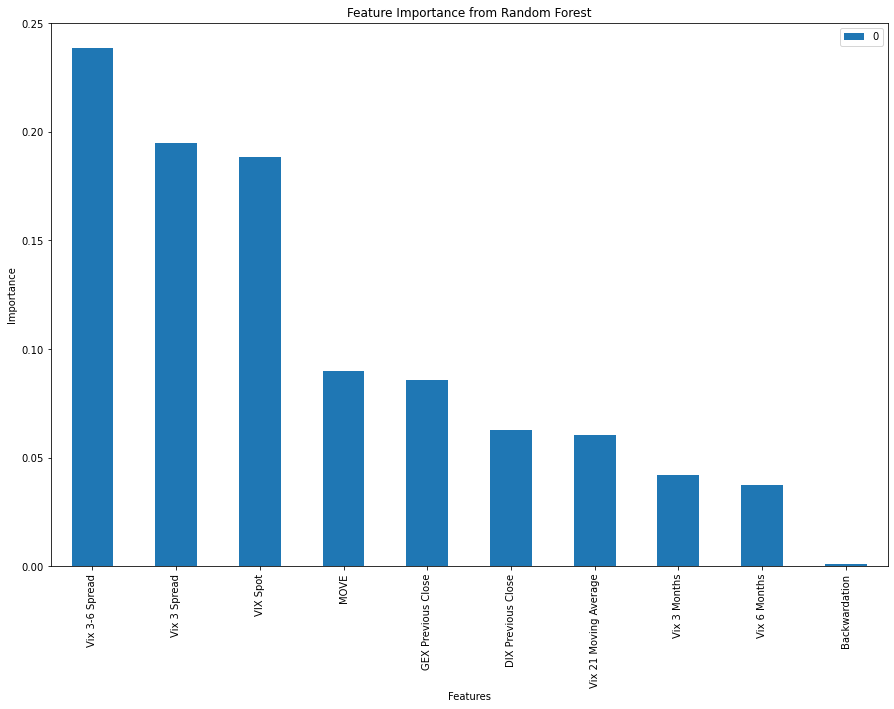

In [316]:
# Graph Importances

importances_df.sort_values(by = 0, ascending=False).plot(kind = "bar")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")

In [ ]:
### Observation: As the above chart shows, the spread in term structure (degree of contango/backwardation) plays a 
### major role in determining the volatility of the market. 